<a href="https://colab.research.google.com/github/RohitSen1235/DataAnalysisAndML/blob/main/AppliedStats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import scipy.stats as st
from scipy.stats import ttest_ind
%matplotlib inline


In [5]:
df=pd.read_csv("/content/drive/My Drive/AI&ML/Applied Statistics/Project/insurance.csv")
print (df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [6]:
np.unique(df['region'])

array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)

In [7]:
for i in df.columns :
    print("Datatype of attribute {:} is {:}".format(i,df[i].dtype))


Datatype of attribute age is int64
Datatype of attribute sex is object
Datatype of attribute bmi is float64
Datatype of attribute children is int64
Datatype of attribute smoker is object
Datatype of attribute region is object
Datatype of attribute charges is float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


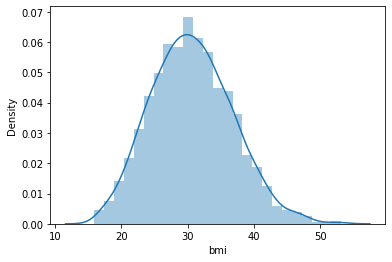

In [8]:
sns.distplot(df['bmi'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


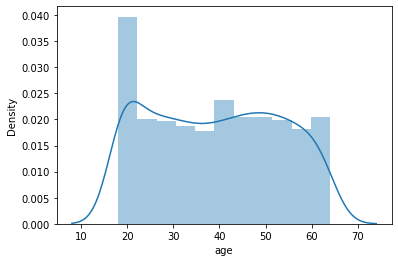

In [9]:
sns.distplot(df['age'])


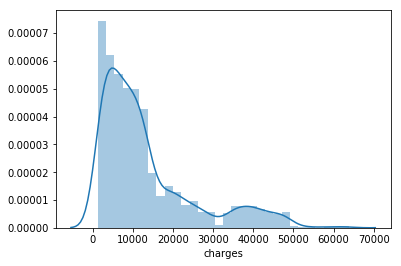

In [ ]:
sns.distplot(df['charges'])

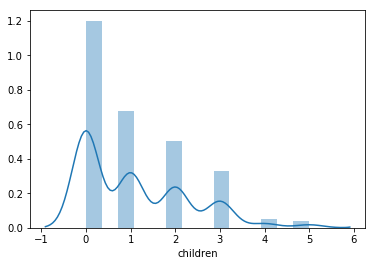

In [ ]:
sns.distplot(df['children'])

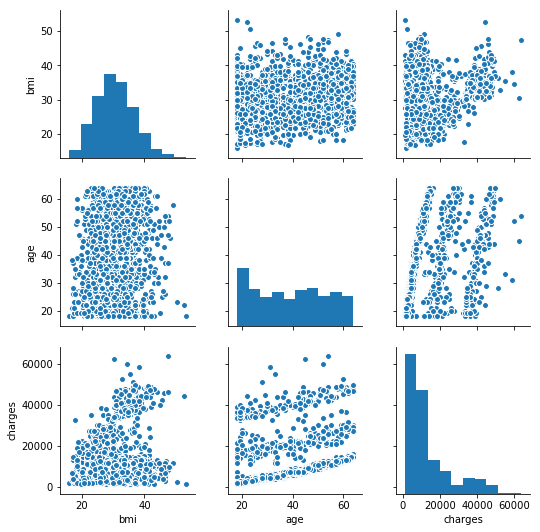

In [ ]:
sns.pairplot(df[['bmi','age','charges']])

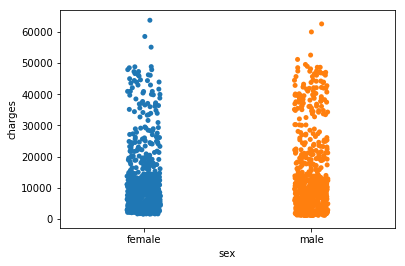

In [ ]:
sns.stripplot(df['sex'],df['charges'],jitter=True)

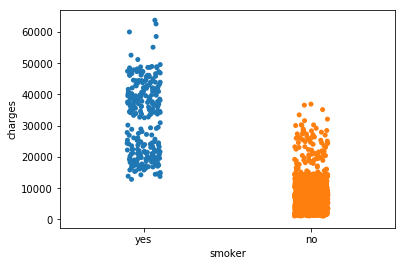

In [ ]:
sns.stripplot(df['smoker'],df['charges'],jitter=True)

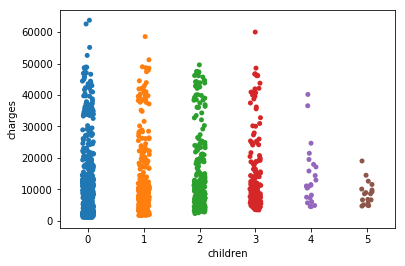

In [ ]:
sns.stripplot(df['children'],df['charges'],jitter=True)

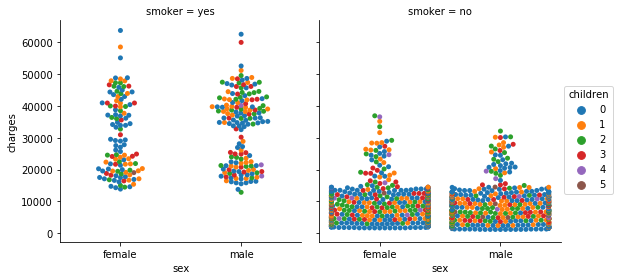

In [ ]:
sns.factorplot(x="sex",y="charges",hue="children",col="smoker",data=df,kind="swarm")


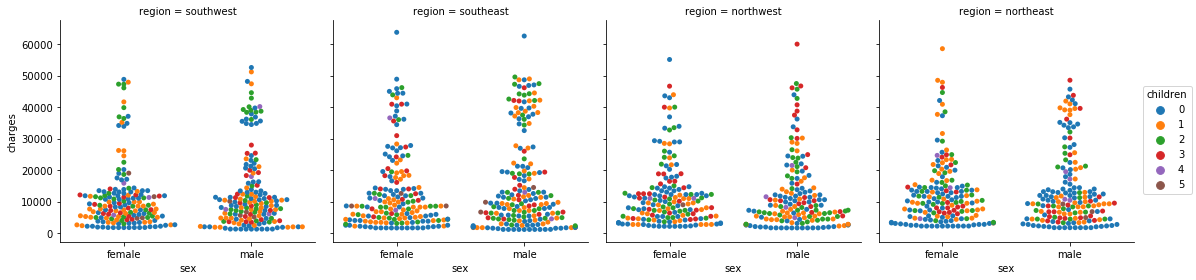

In [ ]:
sns.factorplot(x="sex",y="charges",hue="children",col="region",data=df,kind="swarm")


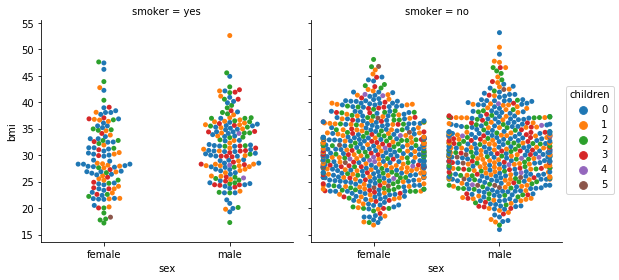

In [ ]:
sns.factorplot(x="sex",y="bmi",hue="children",col="smoker",data=df,kind="swarm")


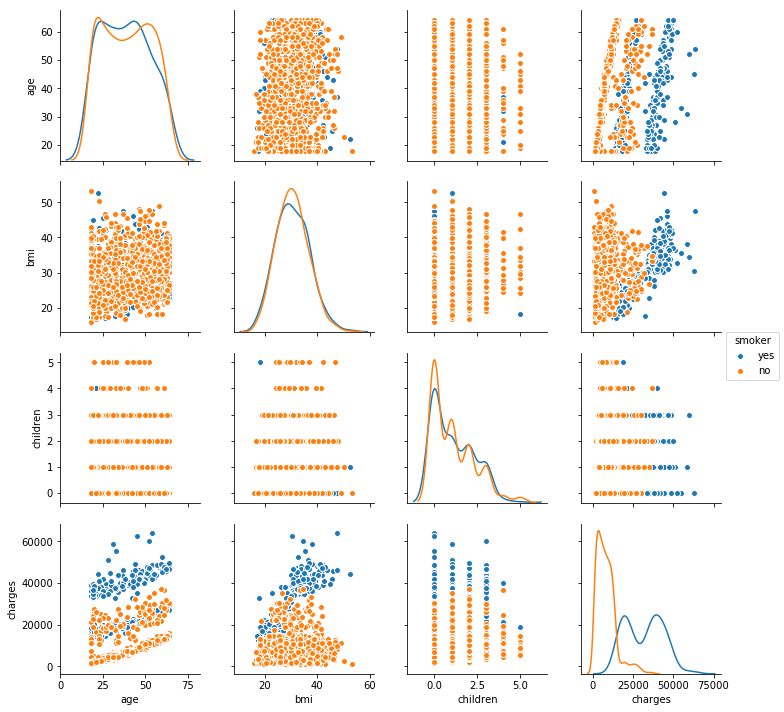

In [ ]:
sns.pairplot(df,hue='smoker',diag_kind='kde',)

Sample Stats :- Mean:13270.422265141257, S.D:12105.484975561612
Smokers:- Mean:32050.23183153284, S.D:11520.46670652943
Non Smokers:- Mean:8434.268297856204, S.D:5990.964530287611

Performing Two-Sample T test

Tstats :46.664921172723716 , p_value: 8.271435842177219e-283

There is a relation between charges and Smoking habit, as shown in the below plot we can see that charges of smokers is significantly higher than non-smokers
NULL Hypothesis is rejected


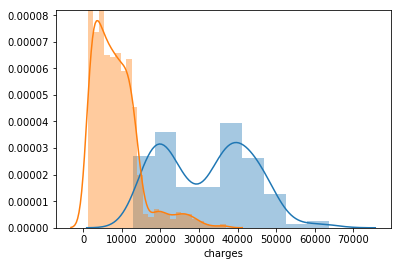

In [ ]:
smokers_mean_charge=np.average(df[df['smoker']=="yes"]['charges'])
nonsmokers_mean_charge=np.average(df[df['smoker']=="no"]['charges'])

smokers_sd_charge=np.std(df[df['smoker']=="yes"]['charges'])
nonsmokers_sd_charge=np.std(df[df['smoker']=="no"]['charges'])

sns.distplot(df[df['smoker']=="yes"]['charges'])
sns.distplot(df[df['smoker']=="no"]['charges'])

from scipy.stats import ttest_ind

print("Sample Stats :- Mean:{:}, S.D:{:}".format(mean_charge,sd_charge))
print("Smokers:- Mean:{:}, S.D:{:}".format(smokers_mean_charge,smokers_sd_charge))
print("Non Smokers:- Mean:{:}, S.D:{:}".format(nonsmokers_mean_charge,nonsmokers_sd_charge))

print("\nPerforming Two-Sample T test")

Tstat, p_value = ttest_ind( df[df['smoker']=="yes"]['charges'], df[df['smoker']=="no"]['charges'])

print("\nTstats :{:} , p_value: {:}".format(Tstat,p_value))

if p_value>0.05:
    print("\nThere is no relation between Charges and Smoking,NULL Hypothesis is accepted")
else:
    print("\nThere is a relation between charges and Smoking habit, as shown in the below plot we can see that charges of smokers is significantly higher than non-smokers\nNULL Hypothesis is rejected")

Sample stats of bmi :- Mean :30.66339686098655 , S.D :6.0959076415894256
Stats of Males :- Mean :30.943128698224854 , S.D :6.13589119333087
Stats of Females :- Mean :30.37774924471299 ,S.D :6.041454877245921

Performing Two-Sample T test

Tstats :1.696752635752224 , p_value: 0.08997637178984932
There is no significant difference between bmi of Males and Females, NULL Hypothesis is ACCEPTED


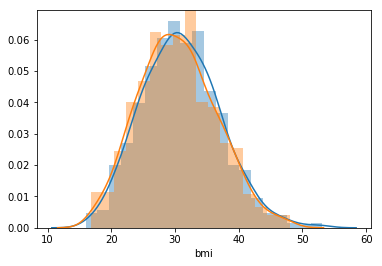

In [ ]:
sns.distplot(df[df['sex']=="male"]['bmi'])
sns.distplot(df[df['sex']=="female"]['bmi'])



#calculation of means of relevant attributes
mean_bmi=np.average(df['bmi'])
male_mean_bmi=np.average(df[df['sex']=="male"]['bmi'])
female_mean_bmi=np.average(df[df['sex']=="female"]['bmi'])



#calculation of std dev of relevant attributes
sd_bmi=np.std(df['bmi'])
male_sd_bmi=np.std(df[df['sex']=="male"]['bmi'])
female_sd_bmi=np.std(df[df['sex']=="female"]['bmi'])


print("Sample stats of bmi :- Mean :{:} , S.D :{:}".format(mean_bmi,sd_bmi))
print("Stats of Males :- Mean :{:} , S.D :{:}".format(male_mean_bmi,male_sd_bmi))
print("Stats of Females :- Mean :{:} ,S.D :{:}".format(female_mean_bmi,female_sd_bmi))

print("\nPerforming Two-Sample T test")

Tstat, p_value = ttest_ind( df[df['sex']=="male"]['bmi'], df[df['sex']=="female"]['bmi'])

print("\nTstats :{:} , p_value: {:}".format(Tstat,p_value))

if(p_value>0.050):
    print("There is no significant difference between bmi of Males and Females, NULL Hypothesis is ACCEPTED")
else:
    print("Thre is a significant difference between bmi of Males and Females, NULL hypothesis is REJECTED ")





In [ ]:
nMaleSmokers=len(df[(df['smoker']=="yes") & (df['sex']=="male")])
nMale=len(df[df['sex']=="male"])

print("Male smokers to non-smokers ratio -> {:}:{:}".format(nMaleSmokers,(nMale-nMaleSmokers)))

nFemaleSmokers=len(df[(df['smoker']=="yes") & (df['sex']=="female")])
nFemale=len(df[df['sex']=="female"])

print("female Smokers to non-smokers ratio -> {:}:{:}".format(nFemaleSmokers,(nFemale-nFemaleSmokers)))

nSmokers=len(df[df['smoker']=="yes"])
ntotal=len(df)

print("Smokers to non-smokers Ratio in the Sample -> {:}:{:}".format(nSmokers,(ntotal-nSmokers)))

smokers_df = pd.DataFrame([[nMaleSmokers,nMale-nMaleSmokers,nMale],[nFemaleSmokers,nFemale-nFemaleSmokers,nFemale],[nSmokers,ntotal-nSmokers,ntotal]],index='male female total'.split(),columns='smokers nonsmokers total'.split())

print("\n{:}\n".format(smokers_df))

smokers_df['Expected_Smokers']=smokers_df['total']*(274/1338)
smokers_df['Expected_non_smokers']=smokers_df['total']*(1064/1338)

smokers_df.drop('total',axis=1,inplace=True)
smokers_df.drop('total',axis=0,inplace=True)

#scipy.stats.chisquare(f_obs, f_exp=None, ddof=0, axis=0)[source]

a=list(np.array(smokers_df['smokers']))
b=list(np.array(smokers_df['nonsmokers']))

f_obs=a+b

c=list(smokers_df['Expected_Smokers'])
d=list(smokers_df['Expected_non_smokers'])

f_exp=c+d

dof=1

print("Observed : {:} \nExpected : {:}\nD.o.F : {:}".format(f_obs,f_exp,dof))

[chi2_stats,p_value]=scipy.stats.chisquare(f_obs, f_exp, dof, axis=0)

print("Chi Squared Stats : {:}".format(chi2_stats))
print("p_value : {:}".format(p_value))

if(p_value>0.050):
    print("\nThere is no difference in the proportion of smokers in Males and females ,i.e. ratio of male smokers and female smokers is the same., Null Hypothesis is Accepted")
else:
    print("\nproportion of male smokers and female smokers is not same , there is a significant difference. Null hypothesis is rejected ")



Male smokers to non-smokersratio -> 159:517
female Smokers to non-smokers ratio -> 115:547
Smokers to non-smokers Ratio in the Sample -> 274:1064

        smokers  nonsmokers  total
male        159         517    676
female      115         547    662
total       274        1064   1338

Observed : [159, 115, 517, 547] 
Expected : [138.4334828101644, 135.56651718983557, 537.5665171898356, 526.4334828101645]
D.o.F : 1
Chi Squared Stats : 7.765921028604451
p_value : 0.020589778527743123

proportion of male smokers and female smokers is not same , there is a significant difference. Null hypothesis is rejected 


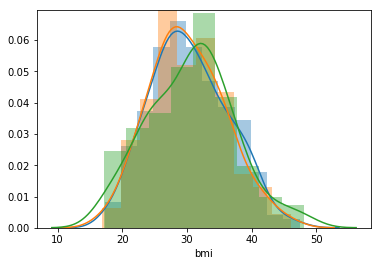

In [ ]:
sns.distplot((df[(df['children']==0) & (df['sex']=="female")]['bmi']))
sns.distplot((df[(df['children']==1) & (df['sex']=="female")]['bmi']))
sns.distplot((df[(df['children']==2) & (df['sex']=="female")]['bmi']))
